In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [126]:
%matplotlib inline

In [127]:
def line_r(line_length):
    '''
    根据电导率计算线电阻
    
    '''    
    copper = 0.0000000175
    square = 0.000025
    r = copper/square*line_length
    return r   

In [128]:
file_dir = "F:\\00 Sphinx Work\\电力估算\\"
file_name = 'input.csv'

In [129]:
data = pd.read_csv(file_dir+file_name)

In [130]:
I = np.zeros(data.shape[0]+1)
U = np.zeros(data.shape[0]+1)
i = np.zeros(data.shape[0]+1)
x = np.arange(0,data.shape[0]+1)

In [131]:
u_start = 240
i_start = data.power.sum()/u_start
v_base = np.ones(x.shape[0])*200

In [132]:
U[0] = u_start
i[0] = 0

In [133]:
i_start

20.0

In [134]:
for m in range (data.shape[0]):       
    total_power = data.power[m:].sum()    
    a = 1
    b = -U[m]/2/line_r(data.length[m])
    c = data.power[m:].sum()    
    p = np.poly1d([a,b,c])      
    
    I[m] = p.r.min()
    
    if m == 0 :
        if I[m] < i_start:
            U[m+1] = U[m] - I[m] * line_r(data.length[m])
           
            i[m+1] = data.power[m]/U[m+1]
  
    else:
        if I[m] < I[m-1] :
            U[m+1] = U[m] - I[m] * line_r(data.length[m])
            U[m+1] = U[m+1]*0.98
            i[m+1] = data.power[m]/U[m+1]
            if i[m+1] > I[m]:
                U[m+1] = U[m]
                i[m+1] = 0                          

        else:
            U[m+1] = U[m]
            i[m+1] = 0
     

In [140]:
m=0      
total_power = data.power[m:].sum()    
a = 1
b = -U[m]/2/line_r(data.length[m])
c = data.power[m:].sum()    
p = np.poly1d([a,b,c])      

I[m] = p.r.min()

In [141]:
p.r

array([  1.71425771e+04,   2.80004573e-01])

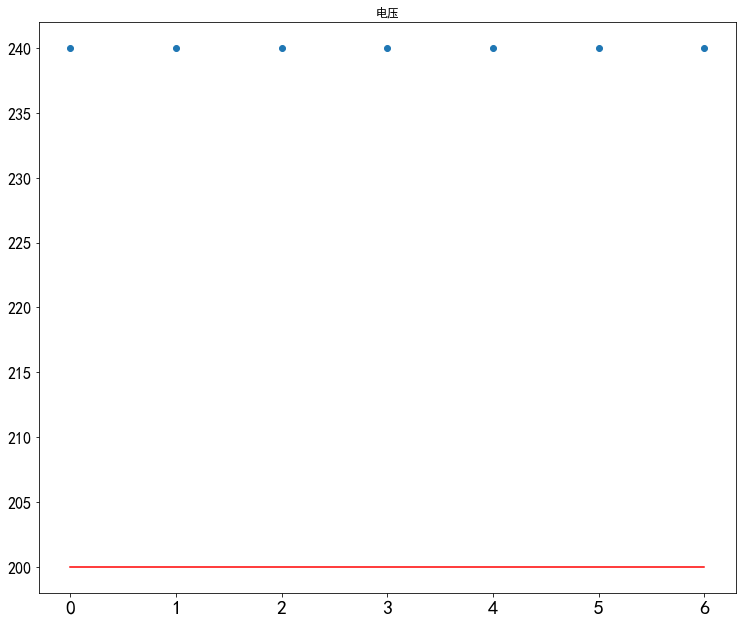

In [135]:
fig, ax = plt.subplots()
fig_size = plt.gcf()
fig_size.set_size_inches(12.5, 10.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=16)
ax.plot(x,v_base,c = 'red')
ax.set_xticks(x)
ax.plot(x,U, 'o')
ax.set_title('电压')
plt.show()

In [136]:
U

array([ 240.        ,  239.99803997,  239.99803997,  239.99803997,
        239.99803997,  239.99803997,  239.99803997])

In [137]:
I

array([ 0.28000457,  3.1578789 ,  2.52504159,  1.89283694,  1.26126304,
        0.63031802,  0.        ])

In [138]:
i

array([ 0.        ,  3.33336056,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

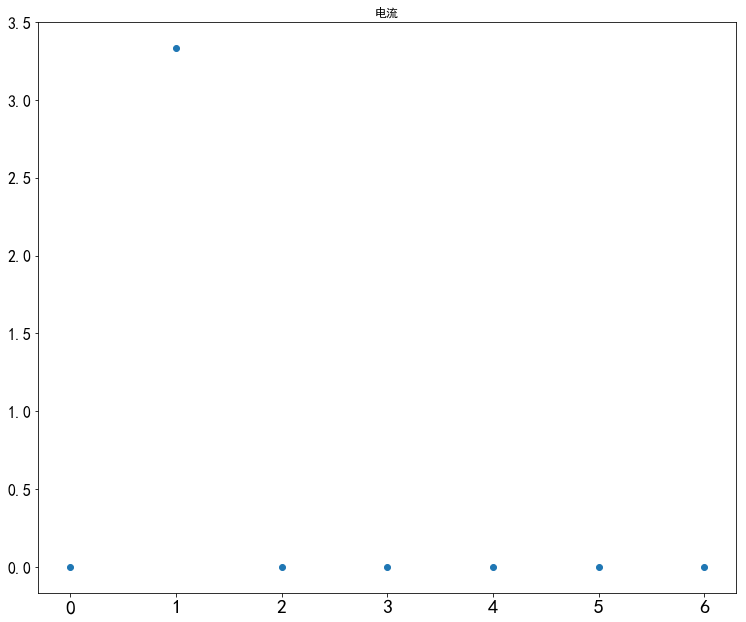

In [139]:
fig, ax = plt.subplots()
fig_size = plt.gcf()
fig_size.set_size_inches(12.5, 10.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=16)
ax.set_xticks(x)
ax.plot(x,i, 'o')
ax.set_title('电流')
plt.show()